<a href="https://colab.research.google.com/github/yash0304/0304first/blob/master/digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Digit Recognition Using Tensor Flow and Keras

### Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

### Importing MNIST Data Set for Digits Data

In [2]:
mnist = tf.keras.datasets.mnist

### Training and Testing Data Set

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
y_test.shape

(10000,)

In [ ]:
x_train[0]

### Normalize

In [14]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)


In [ ]:
x_train[0]

In [ ]:
x_test[0]

### Model Building and Training

In [17]:
model = tf.keras.Sequential()

In [19]:
model.add(tf.keras.layers.Flatten()) # adding flatten curve

In [25]:
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) #relu used for adding Non Linearity


In [26]:
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) #adding dense layer

In [27]:
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) # output as softmax activation method

### Compiling the model


In [30]:
model.compile(optimizer="adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy']
              )
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2629 - accuracy: 0.9232
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1090 - accuracy: 0.9671
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0742 - accuracy: 0.9772
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0540 - accuracy: 0.9831
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0418 - accuracy: 0.9864
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0329 - accuracy: 0.9891
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0263 - accuracy: 0.9914
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0224 - accuracy: 0.9923
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0189 - accuracy: 0.9934
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.015

### Validating the model

In [31]:
validation_loss,validation_accuracy = model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1139 - accuracy: 0.9765


In [33]:
print(validation_loss,validation_accuracy)

0.11388706415891647 0.9764999747276306


### Saving the model

In [36]:
model.save("firstModel.model")

INFO:tensorflow:Assets written to: firstModel.model/assets


### Loading the model

In [37]:
new_model = tf.keras.models.load_model("firstModel.model")

### Predicting with testing data set

In [40]:
prediction = new_model.predict(x_test)

In [64]:
prediction[0]

array([1.4561777e-14, 3.6511918e-11, 1.1269644e-08, 2.8684553e-08,
       6.3032354e-18, 5.7260110e-13, 1.2255738e-19, 1.0000000e+00,
       2.6084910e-13, 2.5739286e-10], dtype=float32)

###Function to show the Output

In [72]:
def show_numbers(i):
  plt.imshow(x_test[i])
  print("The Number shown in the image is:   ",np.argmax(prediction[i]), end='\n')

The Number shown in the image is:    3


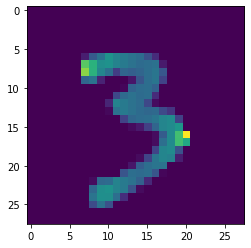

In [73]:
show_numbers(30)